# Inspect Classification Training Dataset

This notebook is meant to be run after the classification dataset has been created but before training a classifier.


In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
!pwd

/home/nrindlaub/animl-ml/classification/notebooks


## Imports and Constants

In [2]:
import sys
sys.path.append("/home/nrindlaub/MegaDetector")
sys.path.append("/home/nrindlaub/ai4eutils")
sys.path

['/home/nrindlaub/animl-ml/classification/notebooks',
 '/home/nrindlaub/MegaDetector',
 '/home/nrindlaub/ai4eutils',
 '/home/nrindlaub/miniconda3/envs/cameratraps-classifier/lib/python37.zip',
 '/home/nrindlaub/miniconda3/envs/cameratraps-classifier/lib/python3.7',
 '/home/nrindlaub/miniconda3/envs/cameratraps-classifier/lib/python3.7/lib-dynload',
 '',
 '/home/nrindlaub/miniconda3/envs/cameratraps-classifier/lib/python3.7/site-packages',
 '/home/nrindlaub/miniconda3/envs/cameratraps-classifier/lib/python3.7/site-packages/IPython/extensions',
 '/home/nrindlaub/.ipython',
 '/home/nrindlaub/MegaDetector',
 '/home/nrindlaub/ai4eutils']

In [3]:
import json
import os

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import seaborn as sns

from classification.train_utils import load_splits, plot_img_grid


disp_context = pd.option_context(
    'display.float_format', '{:0.2f}'.format,
    'display.max_rows', 1000)
sns.set(style='darkgrid')

In [4]:
experiment = 'animl'
SPLITS = ['train', 'val', 'test']
relative_data_dir = f'animl-ml/classification/data/interim/{experiment}/'
relative_crops_dir = f'animl-ml/classification/data/processed/{experiment}/crops/'
crops_dir = os.path.join(os.environ['HOME'], relative_crops_dir)
csv_path = os.path.join(os.environ['HOME'], relative_data_dir, 'classification_ds.csv')
splits_json_path = os.path.join(os.environ['HOME'], relative_data_dir, 'splits.json')


## Load dataset and splits files

In [5]:
df = pd.read_csv(csv_path, index_col=False, float_precision='high')

# merge dataset and location into a (dataset, location) tuple
df['dataset_location'] = list(zip(df['dataset'], df['location']))

label_order = sorted(df['label'].unique())
num_labels = len(label_order)

display(df.head())

,path,dataset,location,dataset_class,confidence,label,dataset_location
0,jldp/864839046685570/government_point_east/1d1...,combined,government_point_east,coyote,1,coyote,"(combined, government_point_east)"
1,jldp/864839046685570/government_point_east/4ce...,combined,government_point_east,coyote,1,coyote,"(combined, government_point_east)"
2,jldp/864839046685570/government_point_east/ea1...,combined,government_point_east,coyote,1,coyote,"(combined, government_point_east)"
3,jldp/X8115CBD/government_point_west/5e725bbdf5...,combined,government_point_west,coyote,1,coyote,"(combined, government_point_west)"
4,jldp/X8115CBD/government_point_west/d97c58fa12...,combined,government_point_west,coyote,1,coyote,"(combined, government_point_west)"


In [6]:
split_to_locs = load_splits(splits_json_path)

loc_to_split = {}
for split, locs in split_to_locs.items():
    for loc in locs:
        loc_to_split[loc] = split

df['split'] = df['dataset_location'].map(loc_to_split.__getitem__)

In [7]:
display(df.head())

,path,dataset,location,dataset_class,confidence,label,dataset_location,split
0,jldp/864839046685570/government_point_east/1d1...,combined,government_point_east,coyote,1,coyote,"(combined, government_point_east)",train
1,jldp/864839046685570/government_point_east/4ce...,combined,government_point_east,coyote,1,coyote,"(combined, government_point_east)",train
2,jldp/864839046685570/government_point_east/ea1...,combined,government_point_east,coyote,1,coyote,"(combined, government_point_east)",train
3,jldp/X8115CBD/government_point_west/5e725bbdf5...,combined,government_point_west,coyote,1,coyote,"(combined, government_point_west)",val
4,jldp/X8115CBD/government_point_west/d97c58fa12...,combined,government_point_west,coyote,1,coyote,"(combined, government_point_west)",val


## (Optional) Compare against another set of splits

In [8]:
def compare_splits(splits_json_path1: str, splits_json_path2: str,
                   name1: str = 'this', name2: str = 'other') -> None:
    """Compare the locations from two different splits.

    Args:
        splits_json_path[X]: str, path to splits.json
        name[X]: str, name to use for comparison
    """
    split_to_locs1 = load_splits(splits_json_path1)
    split_to_locs2 = load_splits(splits_json_path2)

    for split in SPLITS:
        print(f'{name1} # of {split} locs:', len(split_to_locs1[split]))
        print(f'{name2} # of {split} locs:', len(split_to_locs2[split]))
        print(f'number of overlap {split} locs:', len(split_to_locs1[split] & split_to_locs2[split]))
        print('===')

In [ ]:
compare_splits(splits_json_path, '<path_to_splits>/splits.json') 

## Sample crops from each label

bird


,path,dataset,location,dataset_class,confidence,label,dataset_location,split
9080,jldp/2041547/big_cojo/jldp-0841bec79837933a137...,combined,big_cojo,bird,1,bird,"(combined, big_cojo)",val
20974,jldp/2041551/government_point_cliff/jldp-d9e6a...,combined,government_point_cliff,bird,1,bird,"(combined, government_point_cliff)",val
13188,jldp/2041549/percos_post/jldp-b0a40eac409832c9...,combined,percos_post,bird,1,bird,"(combined, percos_post)",train
421,jldp/864839047455205/government_point_south/62...,combined,government_point_south,bird,1,bird,"(combined, government_point_south)",train
13405,jldp/2041549/percos_post/jldp-97cda7ccddad7276...,combined,percos_post,bird,1,bird,"(combined, percos_post)",train


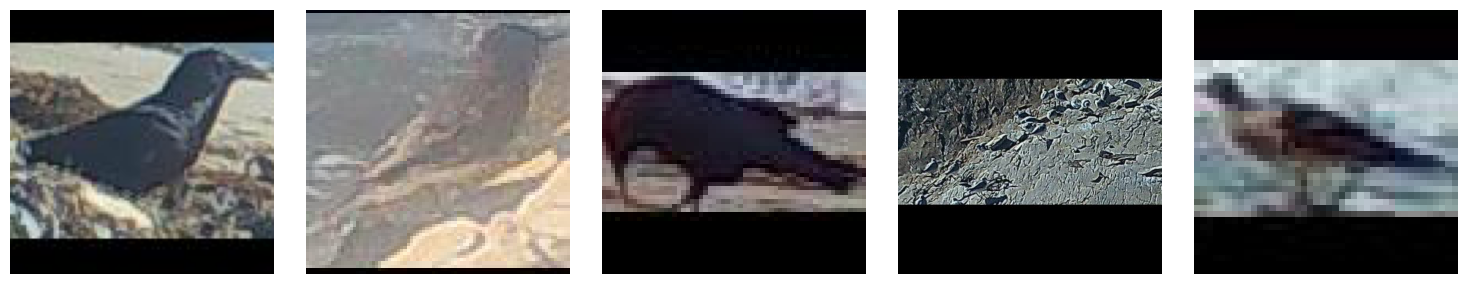

coyote


,path,dataset,location,dataset_class,confidence,label,dataset_location,split
29459,jldp/2041572/vandenberg_boathouse/jldp-88574b4...,combined,vandenberg_boathouse,coyote,1,coyote,"(combined, vandenberg_boathouse)",val
24656,jldp/2041556/black_canyon/jldp-30550caa073e761...,combined,black_canyon,coyote,1,coyote,"(combined, black_canyon)",train
6855,jldp/2041546/boat_cam/jldp-a0289aa4a3fbe26d892...,combined,boat_cam,coyote,1,coyote,"(combined, boat_cam)",train
19282,jldp/2041550/damsite_/jldp-891b4899ab13c9bb0cf...,combined,damsite_,coyote,1,coyote,"(combined, damsite_)",train
23936,jldp/2041556/black_canyon/jldp-627c4af2fb8b0e0...,combined,black_canyon,coyote,1,coyote,"(combined, black_canyon)",train


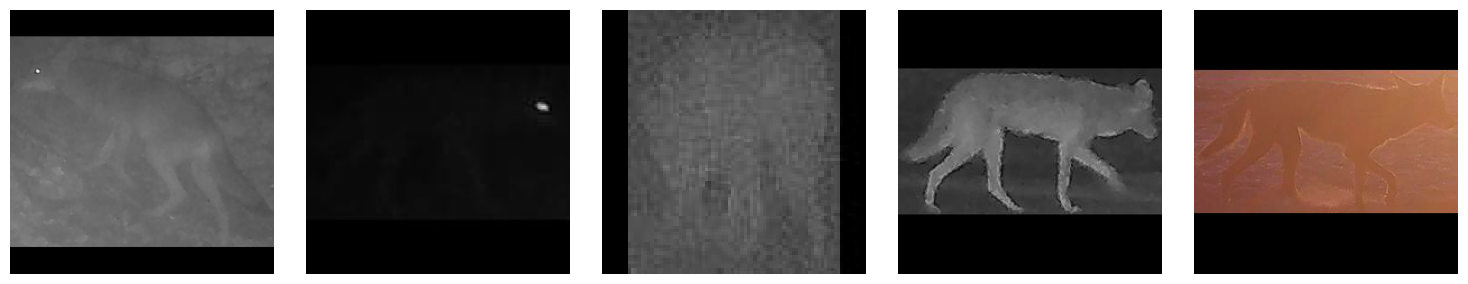

domestic cattle


,path,dataset,location,dataset_class,confidence,label,dataset_location,split
21577,jldp/2041552/north_vista_spring/jldp-7a73cb5eb...,combined,north_vista_spring,domestic cattle,1,domestic cattle,"(combined, north_vista_spring)",train
21169,jldp/2041552/north_vista_spring/jldp-6377731d7...,combined,north_vista_spring,domestic cattle,1,domestic cattle,"(combined, north_vista_spring)",train
22506,jldp/2041552/north_vista_spring/jldp-99f08bd19...,combined,north_vista_spring,domestic cattle,1,domestic cattle,"(combined, north_vista_spring)",train
22705,jldp/2041552/north_vista_spring/jldp-c198f4e7a...,combined,north_vista_spring,domestic cattle,1,domestic cattle,"(combined, north_vista_spring)",train
21849,jldp/2041552/north_vista_spring/jldp-0e1f6c073...,combined,north_vista_spring,domestic cattle,1,domestic cattle,"(combined, north_vista_spring)",train


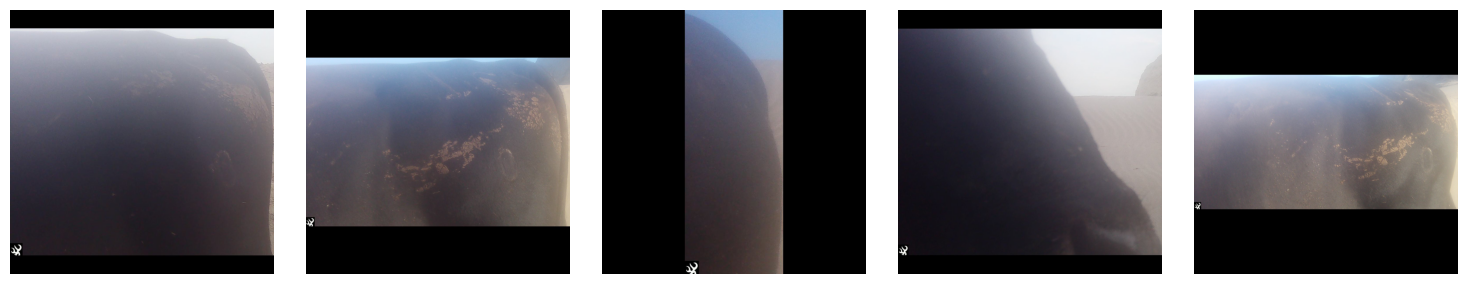

gull


,path,dataset,location,dataset_class,confidence,label,dataset_location,split
14691,jldp/2041550/damsite_/jldp-79516845ed7979d4820...,combined,damsite_,gull,1,gull,"(combined, damsite_)",train
13851,jldp/2041550/damsite_/jldp-c7ad45cd16886adf665...,combined,damsite_,gull,1,gull,"(combined, damsite_)",train
8860,jldp/2041547/big_cojo/jldp-0d711be73a9ce9b404a...,combined,big_cojo,gull,1,gull,"(combined, big_cojo)",val
16806,jldp/2041550/damsite_/jldp-776f0e4fcf0727a2d81...,combined,damsite_,gull,1,gull,"(combined, damsite_)",train
7325,jldp/2041546/boat_cam/jldp-8955fe83d93ab817397...,combined,boat_cam,gull,1,gull,"(combined, boat_cam)",train


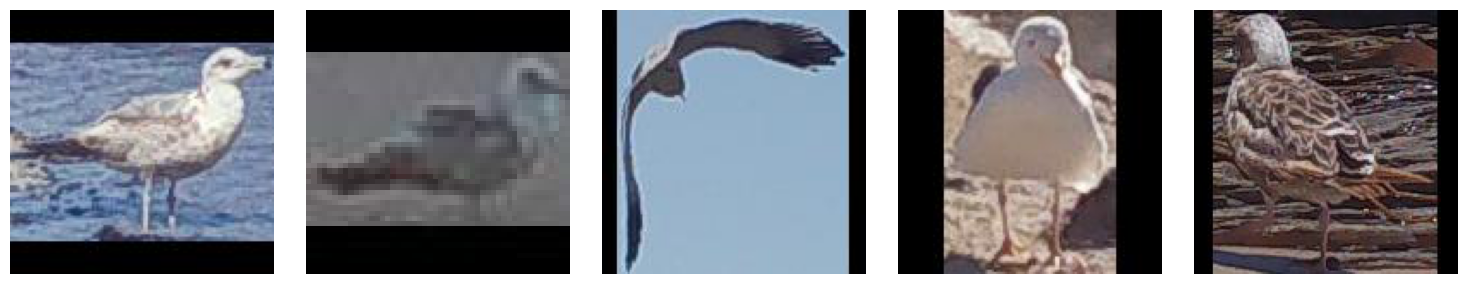

heron


,path,dataset,location,dataset_class,confidence,label,dataset_location,split
19283,jldp/2041550/damsite_/jldp-b209dd37608460ea1a7...,combined,damsite_,heron,1,heron,"(combined, damsite_)",train
17078,jldp/2041550/damsite_/jldp-81c0988cda05098dac9...,combined,damsite_,heron,1,heron,"(combined, damsite_)",train
13307,jldp/2041549/percos_post/jldp-2bf15dff03478a1f...,combined,percos_post,heron,1,heron,"(combined, percos_post)",train
16450,jldp/2041550/damsite_/jldp-69fb6c03e7987083c44...,combined,damsite_,heron,1,heron,"(combined, damsite_)",train
20236,jldp/2041550/damsite_/jldp-eb5891375498cad7859...,combined,damsite_,heron,1,heron,"(combined, damsite_)",train


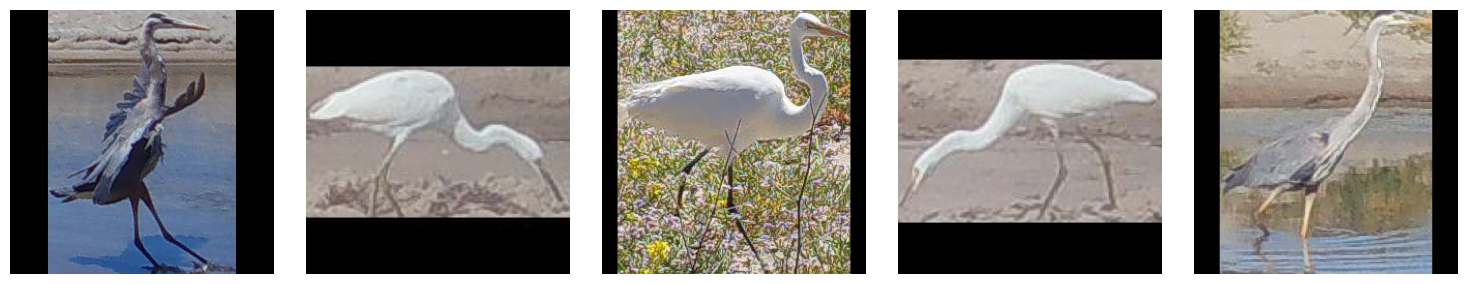

mule deer


,path,dataset,location,dataset_class,confidence,label,dataset_location,split
1736,jldp/X812110K/percos_beach/01d89c017bdfc7b10a7...,combined,percos_beach,mule deer,1,mule deer,"(combined, percos_beach)",test
8895,jldp/2041547/big_cojo/jldp-79d26fa607652e0e923...,combined,big_cojo,mule deer,1,mule deer,"(combined, big_cojo)",val
5590,jldp/X8121104/north_beach/jldp-18f58923bab20d2...,combined,north_beach,mule deer,1,mule deer,"(combined, north_beach)",train
21178,jldp/2041552/north_vista_spring/jldp-e11d676ea...,combined,north_vista_spring,mule deer,1,mule deer,"(combined, north_vista_spring)",train
9606,jldp/2041547/big_cojo/jldp-8f7f8a386b4c0afb9d8...,combined,big_cojo,mule deer,1,mule deer,"(combined, big_cojo)",val


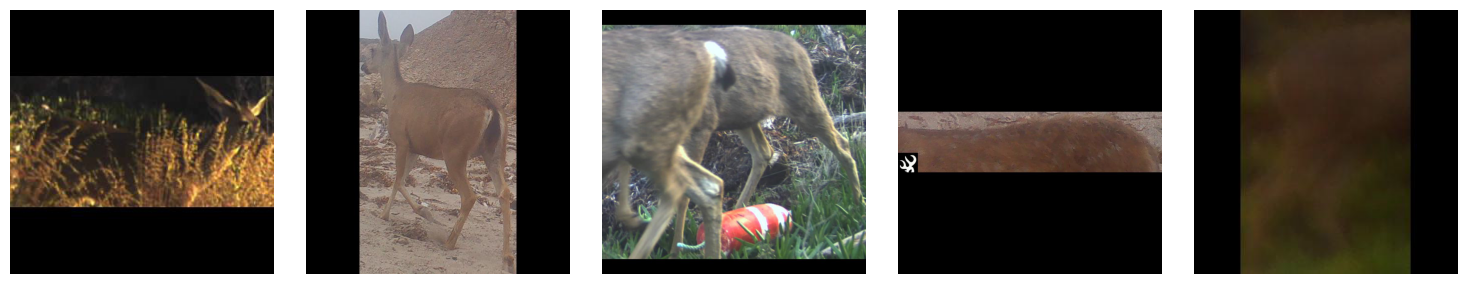

other


,path,dataset,location,dataset_class,confidence,label,dataset_location,split
12438,jldp/2041548/percos_post/jldp-a58eb769ce26a0f0...,combined,percos_post,other,1,other,"(combined, percos_post)",train
29322,jldp/2041572/vandenberg_boathouse/jldp-81e5edf...,combined,vandenberg_boathouse,other,1,other,"(combined, vandenberg_boathouse)",val
12519,jldp/2041548/percos_post/jldp-a33742ef6fbaf754...,combined,percos_post,other,1,other,"(combined, percos_post)",train
12918,jldp/2041548/percos_post/jldp-32f41cfe84adf363...,combined,percos_post,other,1,other,"(combined, percos_post)",train
12126,jldp/2041548/percos_post/jldp-7a39a1d112c262a7...,combined,percos_post,other,1,other,"(combined, percos_post)",train


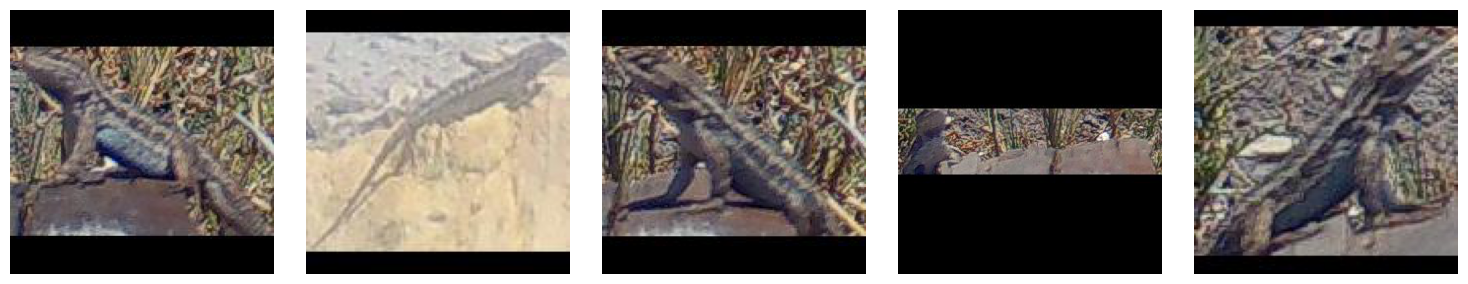

turkey vulture


,path,dataset,location,dataset_class,confidence,label,dataset_location,split
12750,jldp/2041548/percos_post/jldp-8eeef54c43973c9d...,combined,percos_post,turkey vulture,1,turkey vulture,"(combined, percos_post)",train
26386,jldp/2041556/black_canyon/jldp-6bb5fb03178041a...,combined,black_canyon,turkey vulture,1,turkey vulture,"(combined, black_canyon)",train
24958,jldp/2041556/black_canyon/jldp-f5a5d4a31473972...,combined,black_canyon,turkey vulture,1,turkey vulture,"(combined, black_canyon)",train
9784,jldp/2041547/big_cojo/jldp-3e74f3b7d85ed5ef0c0...,combined,big_cojo,turkey vulture,1,turkey vulture,"(combined, big_cojo)",val
24004,jldp/2041556/black_canyon/jldp-aa6a6395c122288...,combined,black_canyon,turkey vulture,1,turkey vulture,"(combined, black_canyon)",train


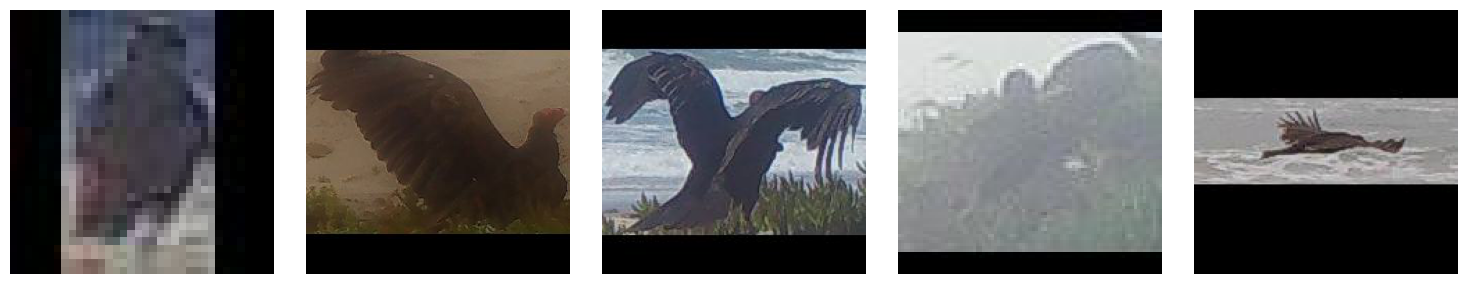

wild boar


,path,dataset,location,dataset_class,confidence,label,dataset_location,split
4367,jldp/X8121104/north_beach/jldp-853282a343c20a8...,combined,north_beach,wild boar,1,wild boar,"(combined, north_beach)",train
3061,jldp/X812110K/percos_beach/jldp-7f50c82ed2cae8...,combined,percos_beach,wild boar,1,wild boar,"(combined, percos_beach)",test
33869,jldp/2041573/wood_canyon/jldp-863dce19080bfaf8...,combined,wood_canyon,wild boar,1,wild boar,"(combined, wood_canyon)",train
36597,jldp/2089815/boneyard/jldp-315a1bb613e141074e2...,combined,boneyard,wild boar,1,wild boar,"(combined, boneyard)",val
31000,jldp/2041573/wood_canyon/jldp-e6283d3779c6138f...,combined,wood_canyon,wild boar,1,wild boar,"(combined, wood_canyon)",train


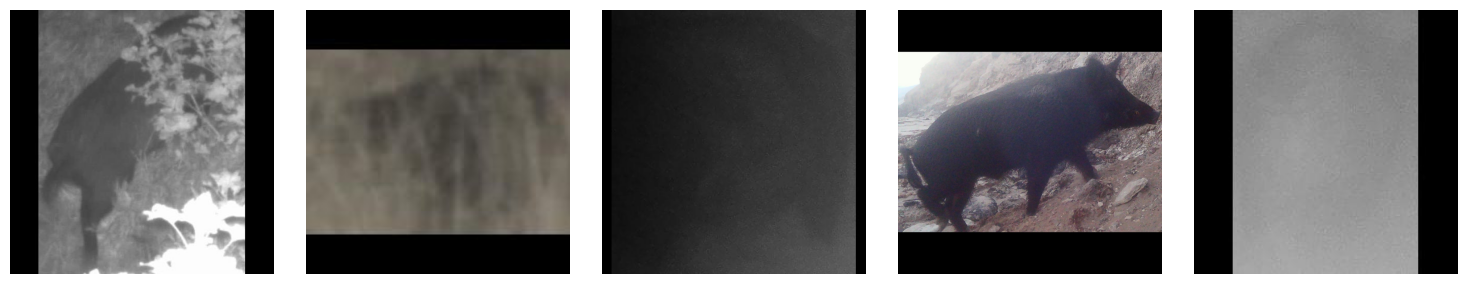

In [10]:
for label, group_df in df.groupby('label'):
    group_df = group_df.sample(5)
    imgs = []
    for file in group_df['path']:
        path = os.path.join(crops_dir, file)
        imgs.append(mpimg.imread(path))
    fig = plot_img_grid(imgs=imgs, row_h=3, col_w=3, ncols=5)
    print(label)
    display(group_df)
    display(fig)

## View distribution of locations and labels by locations

In [11]:
locs_per_split = df.groupby('split')['dataset_location'].nunique()[SPLITS]
locs_per_split.loc['total'] = locs_per_split.sum()
display(locs_per_split.to_frame())

,dataset_location
split,
train,33
val,10
test,4
total,47


In [12]:
locations = (
    df.groupby(['label', 'split'])['dataset_location'].nunique()
    .unstack('split')[SPLITS]
    .fillna(0)
    .astype(int)
)
locations['total'] = locations.sum(axis=1)

locations_frac = locations[SPLITS].div(locations['total'], axis=0)
locations_all = pd.concat(
    [locations_frac, locations], axis=1,
    keys=['frac', 'counts'], sort=False)

with disp_context:
    display(locations_all)

frac           counts               
split           train  val test  train val test total
label                                                
bird             0.65 0.24 0.11     24   9    4    37
coyote           0.65 0.25 0.10     26  10    4    40
domestic cattle  0.67 0.33 0.00      2   1    0     3
gull             0.77 0.23 0.00     10   3    0    13
heron            0.71 0.21 0.07     10   3    1    14
mule deer        0.63 0.26 0.11     17   7    3    27
other            0.64 0.27 0.09     14   6    2    22
turkey vulture   0.75 0.12 0.12      6   1    1     8
wild boar        0.62 0.24 0.14     13   5    3    21

In [13]:
# identify labels with extreme distributions
with disp_context:
    print('(test set < 5) or (test set < 10%)')
    mask = (locations_all.loc[:, ('counts', 'test')] < 5) | (locations_all.loc[:, ('frac', 'test')] < 0.1)
    display(locations_all.loc[mask])

    print('(val set < 5) or (val set < 10%)')
    mask = (locations_all.loc[:, ('counts', 'val')] < 5) | (locations_all.loc[:, ('frac', 'val')] < 0.1)
    display(locations_all.loc[mask])

    print('(train set < 10) or (train set < 40%)')
    mask = (locations_all.loc[:, ('counts', 'train')] < 10) | (locations_all.loc[:, ('frac', 'train')] < 0.4)
    display(locations_all.loc[mask])

(test set < 5) or (test set < 10%)


frac           counts               
split           train  val test  train val test total
label                                                
bird             0.65 0.24 0.11     24   9    4    37
coyote           0.65 0.25 0.10     26  10    4    40
domestic cattle  0.67 0.33 0.00      2   1    0     3
gull             0.77 0.23 0.00     10   3    0    13
heron            0.71 0.21 0.07     10   3    1    14
mule deer        0.63 0.26 0.11     17   7    3    27
other            0.64 0.27 0.09     14   6    2    22
turkey vulture   0.75 0.12 0.12      6   1    1     8
wild boar        0.62 0.24 0.14     13   5    3    21

(val set < 5) or (val set < 10%)


frac           counts               
split           train  val test  train val test total
label                                                
domestic cattle  0.67 0.33 0.00      2   1    0     3
gull             0.77 0.23 0.00     10   3    0    13
heron            0.71 0.21 0.07     10   3    1    14
turkey vulture   0.75 0.12 0.12      6   1    1     8

(train set < 10) or (train set < 40%)


frac           counts               
split           train  val test  train val test total
label                                                
domestic cattle  0.67 0.33 0.00      2   1    0     3
turkey vulture   0.75 0.12 0.12      6   1    1     8

## View distribution of labels by split

In [14]:
labels_dist = (
    df.groupby(['label', 'split']).size()
    .unstack('split')[SPLITS]
    .fillna(0)
    .astype(int)
)

labels_dist_with_total = labels_dist.copy()
labels_dist_with_total.loc['total'] = labels_dist.sum(axis=0)

labels_dist_frac = labels_dist_with_total.div(labels_dist_with_total.sum(axis=1), axis=0)

labels_dist_all = pd.concat([labels_dist_frac, labels_dist_with_total], axis=1,
                            keys=['frac', 'counts'], sort=False)
labels_dist_all.loc[:, ('counts', 'total')] = labels_dist_all.loc[:, 'counts'].sum(axis=1)

with disp_context:
    display(labels_dist_all)

frac           counts                   
split           train  val test  train   val  test  total
label                                                    
bird             0.79 0.16 0.06   2927   580   211   3718
coyote           0.75 0.19 0.06   9996  2535   788  13319
domestic cattle  0.96 0.04 0.00    787    32     0    819
gull             0.68 0.32 0.00   1627   756     0   2383
heron            0.88 0.12 0.00    736    96     1    833
mule deer        0.66 0.22 0.12   3221  1090   592   4903
other            0.84 0.13 0.04   1013   152    48   1213
turkey vulture   0.84 0.16 0.00    893   170     2   1065
wild boar        0.71 0.21 0.07   6478  1939   666   9083
total            0.74 0.20 0.06  27678  7350  2308  37336

In [15]:
# identify labels with extreme distributions
with disp_context:
    print('(test set < 300) and (test set < 9%)')
    test_mask = (labels_dist_all.loc[:, ('counts', 'test')] < 300) & (labels_dist_all.loc[:, ('frac', 'test')] < 0.09)
    print(test_mask.sum())

    print('(val set < 300) and (val set < 9%)')
    val_mask = (labels_dist_all.loc[:, ('counts', 'val')] < 300) & (labels_dist_all.loc[:, ('frac', 'val')] < 0.09)
    print(val_mask.sum())

    print('(train set < 1000) and (train set < 40%)')
    train_mask = (labels_dist_all.loc[:, ('counts', 'train')] < 1000) & (labels_dist_all.loc[:, ('frac', 'train')] < 0.4)
    print(train_mask.sum())
    # display(labels_dist_all.loc[train_mask])

    # combined
    print((train_mask | val_mask | test_mask).sum())
    display(labels_dist_all.loc[train_mask | val_mask | test_mask])

(test set < 300) and (test set < 9%)
6
(val set < 300) and (val set < 9%)
1
(train set < 1000) and (train set < 40%)
0
6


frac           counts                
split           train  val test  train  val test total
label                                                 
bird             0.79 0.16 0.06   2927  580  211  3718
domestic cattle  0.96 0.04 0.00    787   32    0   819
gull             0.68 0.32 0.00   1627  756    0  2383
heron            0.88 0.12 0.00    736   96    1   833
other            0.84 0.13 0.04   1013  152   48  1213
turkey vulture   0.84 0.16 0.00    893  170    2  1065

In [16]:
# approximate sample weights
sample_weights = len(df) / (df['label'].value_counts() * df['label'].nunique())
with disp_context:
    display(sample_weights)

coyote            0.31
wild boar         0.46
mule deer         0.85
bird              1.12
gull              1.74
other             3.42
turkey vulture    3.90
heron             4.98
domestic cattle   5.07
Name: label, dtype: float64

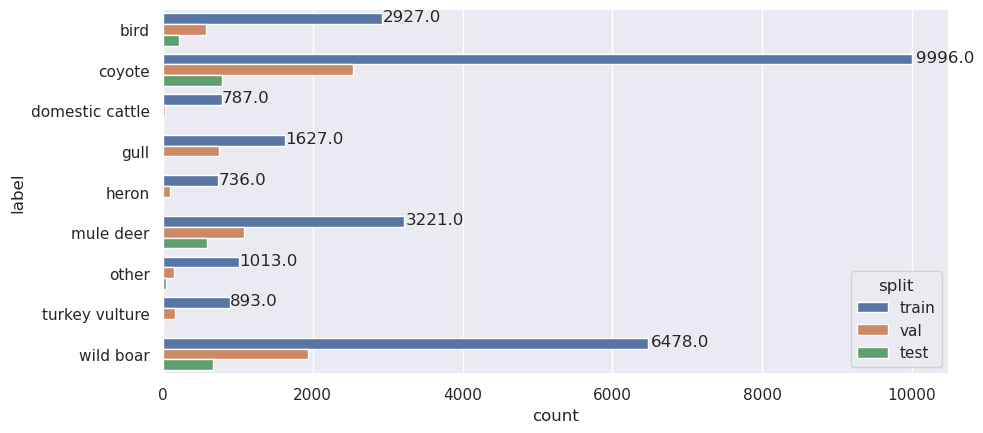

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(10, num_labels/2), tight_layout=True)
sns.countplot(y='label', hue='split', data=df, order=label_order, ax=ax, hue_order=SPLITS)

# roughly equivalent to:
# labels_dist.plot(kind='barh', figsize=(10, num_labels/2), width=0.8, ax=ax)
# ax.invert_yaxis()
# ax.grid(axis='y')
# ax.set_xlabel('count')

for i, p in enumerate(ax.patches):
    if i < len(ax.patches) / 3:
        ax.annotate(str(p.get_width()), (p.get_width() * 1.005, p.get_y() + 0.2))

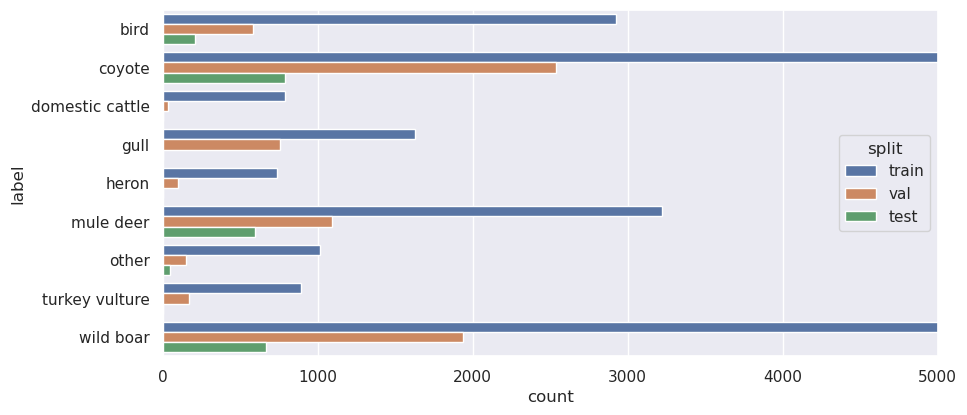

In [18]:
# if necessary, zoom in the x-axis from the plot above
fig, ax = plt.subplots(1, 1, figsize=(10, num_labels/2))
ax = sns.countplot(data=df, y='label', hue='split', order=label_order, ax=ax, hue_order=SPLITS)
ax.set_xlim(0, 5000)
plt.show()

split,train,val,test
label,,,
bird,10.58,7.89,9.14
coyote,36.12,34.49,34.14
domestic cattle,2.84,0.44,0.00
gull,5.88,10.29,0.00
heron,2.66,1.31,0.04
mule deer,11.64,14.83,25.65
other,3.66,2.07,2.08
turkey vulture,3.23,2.31,0.09
wild boar,23.40,26.38,28.86


<AxesSubplot:title={'center':'How much each class contributes to each split'}, xlabel='% of split', ylabel='label'>

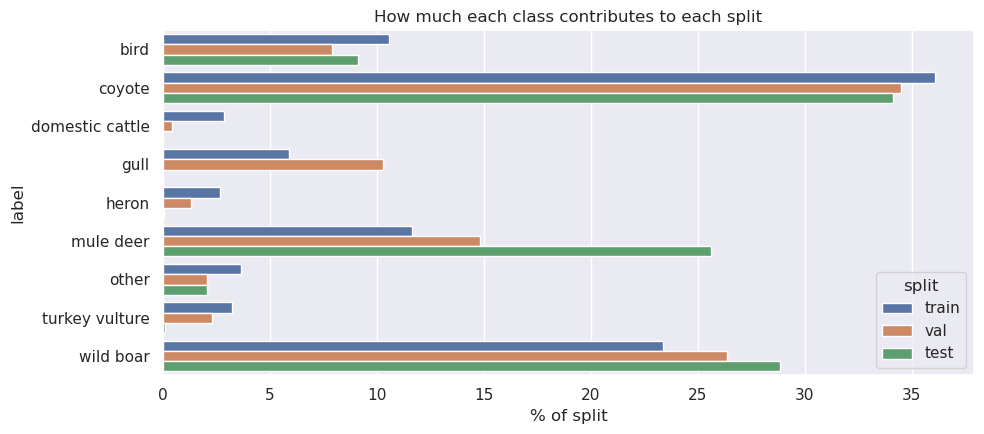

In [19]:
labels_dist_norm = labels_dist / labels_dist.sum(axis=0) * 100
with disp_context:
    display(labels_dist_norm)

labels_dist_norm = labels_dist_norm.stack('split').rename('% of split').reset_index()
fig, ax = plt.subplots(1, 1, figsize=(10, num_labels/2), tight_layout=True)
ax.set_title('How much each class contributes to each split')
sns.barplot(data=labels_dist_norm, y='label', x='% of split', hue='split', ax=ax)

## View distrbution of labels by split and dataset

In [ ]:
# which datasets are represented in each split?
with disp_context:
    display(df.groupby(['label', 'split'])['dataset'].unique().unstack('split')[SPLITS])

In [ ]:
labels_by_split_ds = df.groupby(['label', 'split', 'dataset']).size().rename('count')
with disp_context:
    display(labels_by_split_ds.unstack('split')[SPLITS].fillna(0).astype(int))

In [ ]:
sns.catplot(data=labels_by_split_ds.reset_index(),
            x='count', y='label', hue='split', col='dataset',
            col_wrap=1, kind='bar', sharex=False)

## View distribution of labels by split, dataset, and location

For each label, dataset, and split:
* plot a histogram of the number of crops per location.

In [ ]:
labels_by_split_ds_loc = df.groupby(['label', 'dataset', 'location', 'split']).size().rename('count').reset_index()
with disp_context:
    display(labels_by_split_ds_loc.head())
labels_by_split_ds_loc['split'] = labels_by_split_ds_loc['split'].astype('category')
sns.catplot(data=labels_by_split_ds_loc,
            col='label', y='dataset', x='count', hue='split',
            kind='strip', dodge=True,
            col_wrap=5, sharex=False, sharey=False)